In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
# Section 1:

In [3]:
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

def relu_activation(z):
    return np.maximum(0, z)

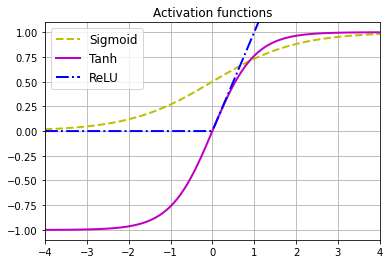

In [4]:
z = np.linspace(-4, 4, 100)
plt.plot(z, sigmoid_activation(z), "y--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "m-", linewidth=2, label="Tanh")
plt.plot(z, relu_activation(z), "b-.", linewidth=2, label="ReLU")
plt.legend(loc="upper left", fontsize=12)
plt.grid(True)
plt.title("Activation functions", fontsize=12)
plt.axis([-4, 4, -1.1, 1.1])
plt.show()

In [5]:
# Section 2:

In [6]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


2.7.0
2.7.0


In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
print(X_train.shape)
print(X_train.dtype)
print(y_test.shape)
print(y_test.dtype)


(60000, 28, 28)
uint8
(10000,)
uint8


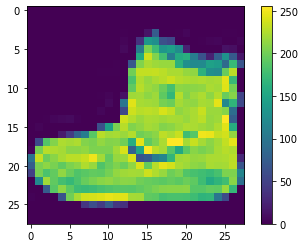

In [9]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
X_valid, X_train = X_train[:5000] / 255.0, X_train[5000:] / 255.0
y_valid, y_train = y_train[:5000], y_train[5000:]
X_test = X_test / 255.0

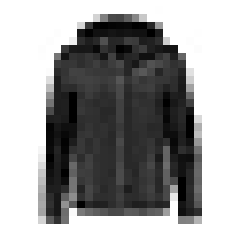

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [18]:
class_names[y_train[0]]

'Coat'

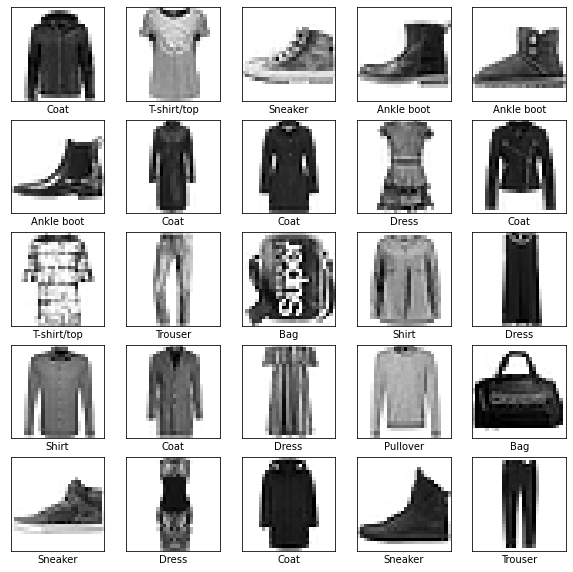

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='binary')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2021-11-14 22:29:44.133287: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.layers

In [23]:
hidden_layer_1 = model.layers[1]

In [24]:
W, b = hidden_layer_1.get_weights()
print(W.round(2))
print(W.shape)
print(b.round(2))
print(b.shape)

[[-0.05 -0.05 -0.05 ...  0.07  0.01  0.  ]
 [ 0.01  0.01  0.05 ...  0.05 -0.    0.06]
 [-0.05  0.02 -0.03 ... -0.07 -0.07  0.05]
 ...
 [-0.    0.04  0.03 ... -0.06 -0.04 -0.07]
 [ 0.03 -0.06  0.01 ...  0.    0.02 -0.02]
 [ 0.07 -0.04 -0.05 ... -0.02 -0.06 -0.  ]]
(784, 256)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [26]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7003 - accuracy: 0.7696 - val_loss: 0.5099 - val_accuracy: 0.8264
Epoch 2/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4868 - accuracy: 0.8294 - val_loss: 0.4407 - val_accuracy: 0.8500
Epoch 3/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4429 - accuracy: 0.8437 - val_loss: 0.4280 - val_accuracy: 0.8546
Epoch 4/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4147 - accuracy: 0.8541 - val_loss: 0.4065 - val_accuracy: 0.8624
Epoch 5/20
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3955 - accuracy: 0.8613 - val_loss: 0.3911 - val_accuracy: 0.8656
Epoch 6/20
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3793 - accuracy: 0.8660 - val_loss: 0.3741 - val_accuracy: 0.8732
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3669 - accuracy: 0.8706 - val_loss: 0.3660 - val_accuracy:

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

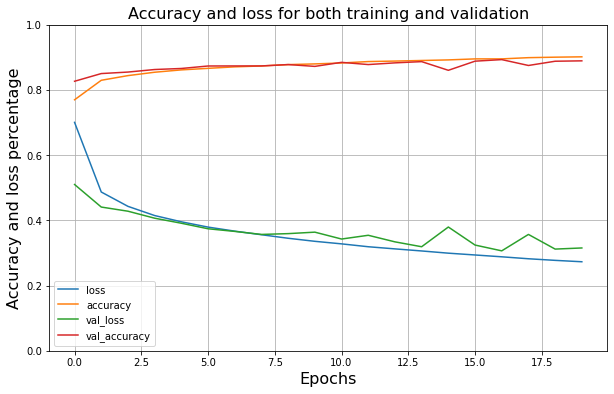

In [28]:
pd.DataFrame(history_dict).plot(figsize=(10,6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('Accuracy and loss for both training and validation', fontsize=16)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy and loss percentage', rotation=90, fontsize=16)
plt.show()

In [29]:
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 987us/step - loss: 0.3547 - accuracy: 0.8739
Test accuracy: 0.8738999962806702


In [30]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.09, 0.  , 0.89],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.19, 0.  , 0.03, 0.  , 0.02, 0.  , 0.76, 0.  , 0.  , 0.  ]],
      dtype=float32)

In [32]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
print(y_pred)

[9 2 1 1 6]


In [33]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

In [34]:
y_new = y_test[:5]
y_new

array([9, 2, 1, 1, 6], dtype=uint8)